<a href="https://colab.research.google.com/github/abiolaTresor/NLP-Bert-Discovery/blob/master/BERT_vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Introduction

First, we need to install the transformers library.
Other than that, the packages will need are already installed in Colab (e.g., pytorch).

In [ ]:
!pip install transformers

     |████████████████████████████████| 890kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 9.8MB/s 
     |████████████████████████████████| 3.0MB 26.0MB/s 
     |████████████████████████████████| 890kB 41.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=97567efda3e666a10cf6af9862d1453d75943a66610ae651559e35bf339c0a74
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
# Imports
import torch
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Set plotting style
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

## Inspect BERT Vocabulary

Let us start by inspecting the BERT vocabulary that is the words, subwords and characters that BERT learned their embeddings during pretraining.

### Vocabulary
First, we'll retrieve the entire list of "tokens" and write these out to text files so we can see them.

In [ ]:
# Load pre-trained model tokenizer, and write each token on a new line
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

with open("vocabulary.txt", 'w') as f:
    for token in tokenizer.vocab.keys():
        f.write(token + '\n')

Now if you go and open the file we're just dumped, you'll see the vocabulary BERT uses, for example:

* The first 999 tokens (1-indexed) appear to be reserved, and most are of the form [unused957].
    * 1   - [PAD]
    * 101 - [UNK]
    * 102 - [CLS]
    * 103 - [SEP]
    * 104 - [MASK]
* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, the most common subword.
    * The last whole word is at 29612, "necessitated"

### Single Characters

As discussed earlier, BERT vocabulary contains subwords and characters, that are very useful to represent some the input text if its not in the vocabulary in the form of whole word. Avoiding the need to UNKOWN tokens.

Let's see how much of the vocabulary are single characters and subwords of single characters, i.e., subwords have a '##' as a prefix, so **##s** is a subword and **s** in a charcater.


The following code prints out all of the single character tokens in vocabulary, as well as all of the single-character tokens preceded by '##'.

It turns out that these are matching sets--for every standalone character there is also a '##' version. There are 997 single character tokens.

The following cell iterates over the vocabulary, pulling out all of the single character tokens.

In [ ]:
# Fetch tokens that are either characters, so of length one
# Or tokens that are either subword of one character, so of length 3 and a prefix ##

one_chars = []
one_chars_subwords = []

for token in tokenizer.vocab.keys():
    if len(token) == 1:
        one_chars.append(token)
    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_subwords.append(token)

print('Number of single character tokens:', len(one_chars), '\n')

print('Number of single character subwords:', len(one_chars_subwords), '\n')

Number of single character tokens: 997 

Number of single character subwords: 997 



In [ ]:
# Print all of the single characters, 40 per row.
for i in range(0, len(one_chars), 40):
    print(' '.join(one_chars[i:i + 40]))

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ˤ α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и к л м н о п р с т у
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ք ־ א ב ג ד ה ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د
ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च
ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ
ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப ம ய ர ல ள வ ா ி ு ே
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ
ᅯ ᅲ ᅳ ᅴ ᅵ ᆨ ᆫ ᆯ ᆷ ᆸ ᆼ ᴬ ᴮ ᴰ ᴵ ᴺ ᵀ ᵃ ᵇ ᵈ 

In [ ]:
# Print all of the single character subwords, 40 per row, without the hashes.
one_chars_subwords = [token.replace('##', '') for token in one_chars_subwords]

for i in range(0, len(one_chars_subwords), 40):
    print(' '.join(one_chars_subwords[i:i + 40]))

s a e i n o d r y t l m u h k c g p 2 z 1 b 3 f 4 6 7 x v 8 5 9 0 w j q ° ₂ а и
² ₃ ı ₁ ⁺ ½ о ه ي α е د ن ν ø р ₄ ₀ ر я ³ ι ł н ᵢ ₙ ß ة ς م − т ː ل ь к ♭ η ی в
ا × ¹ ы ה ɛ л ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡
¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ± ´ µ ¶ · º » ¼ ¾ ¿ æ ð ÷ þ đ ħ ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ˡ ˢ ˣ ˤ β γ δ ε ζ
θ κ λ μ ξ ο π ρ σ τ υ φ χ ψ ω б г д ж з м п с у ф х ц ч ш щ ъ э ю ђ є і ј љ њ ћ
ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ ք ־ א ב ג ד ו ז ח ט י ך כ ל ם מ ן נ ס
ע ף פ ץ צ ק ר ש ת ، ء ب ت ث ج ح خ ذ ز س ش ص ض ط ظ ع غ ـ ف ق ك و ى ٹ پ چ ک گ ں ھ
ہ ے अ आ उ ए क ख ग च ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ
ই উ এ ও ক খ গ চ ছ জ ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப
ம ய ர ல ள வ ா ி ு ே ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད
ན པ བ མ འ ར ལ ས မ ა ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ
ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ ᅯ ᅲ ᅳ ᅴ ᅵ ᆨ ᆫ ᆯ ᆷ ᆸ 

In [ ]:
# We see that each character can also be a subword
print('Are the two sets identical?', set(one_chars) == set(one_chars_subwords))

Are the two sets identical? True


In [ ]:
print(one_chars_subwords)

['s', 'a', 'e', 'i', 'n', 'o', 'd', 'r', 'y', 't', 'l', 'm', 'u', 'h', 'k', 'c', 'g', 'p', '2', 'z', '1', 'b', '3', 'f', '4', '6', '7', 'x', 'v', '8', '5', '9', '0', 'w', 'j', 'q', '°', '₂', 'а', 'и', '²', '₃', 'ı', '₁', '⁺', '½', 'о', 'ه', 'ي', 'α', 'е', 'د', 'ن', 'ν', 'ø', 'р', '₄', '₀', 'ر', 'я', '³', 'ι', 'ł', 'н', 'ᵢ', 'ₙ', 'ß', 'ة', 'ς', 'م', '−', 'т', 'ː', 'ل', 'ь', 'к', '♭', 'η', 'ی', 'в', 'ا', '×', '¹', 'ы', 'ה', 'ɛ', 'л', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '±', '´', 'µ', '¶', '·', 'º', '»', '¼', '¾', '¿', 'æ', 'ð', '÷', 'þ', 'đ', 'ħ', 'ŋ', 'œ', 'ƒ', 'ɐ', 'ɑ', 'ɒ', 'ɔ', 'ɕ', 'ə', 'ɡ', 'ɣ', 'ɨ', 'ɪ', 'ɫ', 'ɬ', 'ɯ', 'ɲ', 'ɴ', 'ɹ', 'ɾ', 'ʀ', 'ʁ', 'ʂ', 'ʃ', 'ʉ', 'ʊ', 'ʋ', 'ʌ', 'ʎ', 'ʐ', 'ʑ', 'ʒ', 'ʔ', 'ʰ', 'ʲ', 'ʳ', 'ʷ', 'ʸ', 'ʻ', 'ʼ', 'ʾ', 'ʿ', 'ˈ', 'ˡ', 'ˢ', 'ˣ', 'ˤ', 'β', 'γ', 'δ', 'ε', 'ζ'

### Subwords vs. Whole-words

Now, let's gather some statistics on the vocabulary.

Maximum token length: 18


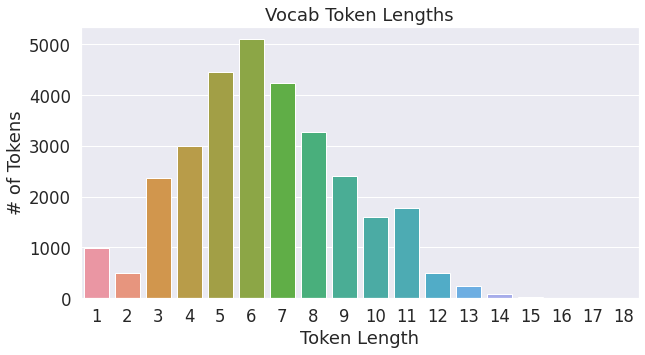

In [ ]:
# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

##  <span style="color:red">Your turn. </span>

1. **Count the number of subwords and whole words in the vocabulary.**
2. **Plot the lengths of the subwords and whole words.**
3. **Percentage of subwords and whole words out of the whole vocabulary.**

In [ ]:
# Count the number of subwords in the vocabulary.
numberOfSubWords = sum([token[0:2]=="##" for token in tokenizer.vocab.keys()])
print("the number of subwors in Bert's vocabulary is:", numberOfSubWords)
numberOfWords = sum([((len(token)>1 and token[0:2] != "##") or (token[0:2] == "##" and len(token[2:])>1)) for token in tokenizer.vocab.keys()])
print("the number of words in Bert's vocabulary is:", numberOfWords)

the number of subwors in Bert's vocabulary is: 5828
the number of words in Bert's vocabulary is: 28528


Text(0, 0.5, 'counts')

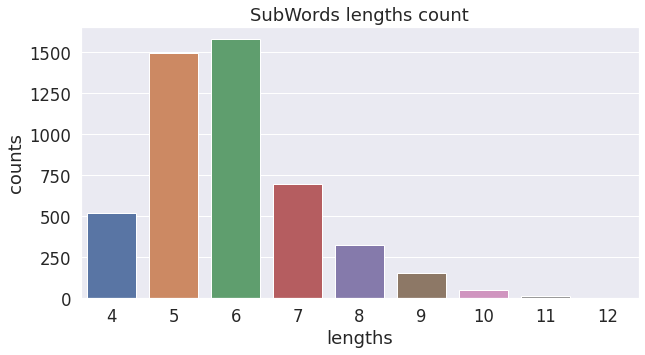

In [ ]:
# Plot the subword lengths (not including the two '##' characters).
subWLength = [len(token) for token in tokenizer.vocab.keys() if (token[0:2]=='##' and len(token) > 3)]
sns.countplot(subWLength)
plt.title("SubWords lengths count")
plt.xlabel("lengths")
plt.ylabel("counts")

In [ ]:
# Calculate the percentage of words that are '##' subwords.
print("the percentage of words that are subwords is: ", numberOfSubWords/numberOfWords, "%")

the percentage of words that are subwords is:  0.2042905215928211 %


### Names



Let's see if BERT vocabulary contrains any names, we'll use a list of popular names provided by gutenberg [here]('http://www.gutenberg.org/files/3201/files/NAMES.TXT'). So first, we'll download using wget.

In [ ]:
!pip install wget
import wget

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=4f4b543123b123d62e37187b4c3bc0d5dfeff21a9c307a3261419912da614378
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


'first-names.txt'

In [ ]:
# Read and decode the names, then convert them to lowercase, and strip newlines.

with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Number of names: {:,}'.format(len(names)))
print('Example:', random.choice(names))

Number of names: 21,985
Example: edison


##  <span style="color:red">Your turn.</span>

1. **Count how many names are in the vocabulary.**
2. **Count how many number are in the vocabulary.**

### Names

In [ ]:
# Count the number of namesin the vocabulary
print("the number of names in the vocavbulary is:",sum([token in names for token in tokenizer.vocab.keys()]))


the number of names in the vocavbulary is: 3865


### Numbers

In [ ]:
# Count how many numbers are in the vocabulary.
print("the number of numbers in the vocabulary is:", sum([token.isnumeric() for token in tokenizer.vocab.keys()]))

the number of numbers in the vocabulary is: 894
